In [1]:
import os
import numpy as np
from skimage.draw import line
import matplotlib.pyplot as plt

# CONFIG
BASE_GRID_PATH = "Processed_Area"
BASE_VIS_PATH = "Processed_Area"
MAX_RANGE_CELLS = int(5 / 0.2)  # 5 meters / 0.2m (20cm) per cell = 25 cells
AREAS = [f"Area_{i}" for i in range(1, 7)]

# Ensure visibility folders exist
for area in AREAS:
    os.makedirs(os.path.join(BASE_VIS_PATH, f"{area}_visibility"), exist_ok=True)


In [2]:
# Helper to check line-of-sight

def is_visible(grid, src, dst):
    rr, cc = line(src[0], src[1], dst[0], dst[1])
    for r, c in zip(rr, cc):
        if r < 0 or c < 0 or r >= grid.shape[0] or c >= grid.shape[1]:
            return False
        if grid[r, c] == 1:  # obstacle blocks the view
            return False
    return True

In [3]:
# Generate visibility map for one room
def compute_visibility_map(grid, max_range):
    free_cells = np.argwhere(grid == 0)
    visibility_dict = {}

    for i, src in enumerate(free_cells):
        visible_targets = []
        for dst in free_cells:
            if np.linalg.norm(src - dst) <= max_range and is_visible(grid, tuple(src), tuple(dst)):
                visible_targets.append(tuple(dst))
        visibility_dict[tuple(src)] = visible_targets
        if i % 100 == 0:
            print(f"Processed {i}/{len(free_cells)} cells")
    return visibility_dict

In [4]:
# Process all .npy grids in all areas
for area in AREAS:
    grid_folder = os.path.join(BASE_GRID_PATH, f"{area}_grid")
    vis_folder = os.path.join(BASE_VIS_PATH, f"{area}_visibility")
    print(f"\n=== Processing Visibility for {area} ===")

    for fname in os.listdir(grid_folder):
        if not fname.endswith(".npy"): continue
        room_name = fname.replace("_grid.npy", "")
        print(f"\nRoom: {room_name}")

        grid = np.load(os.path.join(grid_folder, fname))
        visibility = compute_visibility_map(grid, MAX_RANGE_CELLS)

        # Save visibility dictionary as .npz
        save_path = os.path.join(vis_folder, f"{room_name}_visibility.npz")
        np.savez_compressed(save_path, **{str(k): v for k, v in visibility.items()})

print("\nAll visibility maps saved.")



=== Processing Visibility for Area_1 ===

Room: office_20
Processed 0/62 cells

Room: office_21
Processed 0/85 cells

Room: hallway_6
Processed 0/2621 cells
Processed 100/2621 cells
Processed 200/2621 cells
Processed 300/2621 cells
Processed 400/2621 cells
Processed 500/2621 cells
Processed 600/2621 cells
Processed 700/2621 cells
Processed 800/2621 cells
Processed 900/2621 cells
Processed 1000/2621 cells
Processed 1100/2621 cells
Processed 1200/2621 cells
Processed 1300/2621 cells
Processed 1400/2621 cells
Processed 1500/2621 cells
Processed 1600/2621 cells
Processed 1700/2621 cells
Processed 1800/2621 cells
Processed 1900/2621 cells
Processed 2000/2621 cells
Processed 2100/2621 cells
Processed 2200/2621 cells
Processed 2300/2621 cells
Processed 2400/2621 cells
Processed 2500/2621 cells
Processed 2600/2621 cells

Room: hallway_7
Processed 0/1432 cells
Processed 100/1432 cells
Processed 200/1432 cells
Processed 300/1432 cells
Processed 400/1432 cells
Processed 500/1432 cells
Processed 

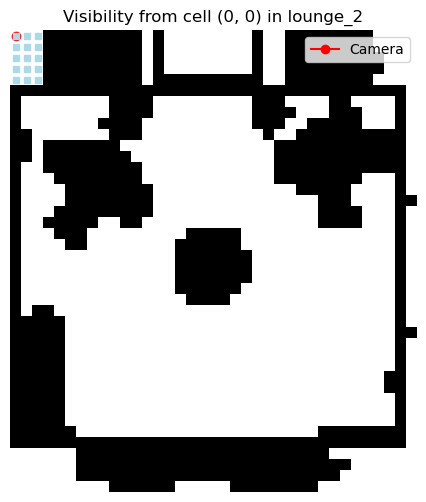

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os

# CONFIG
AREA = "Area_3"
ROOM = "lounge_2"
GRID_PATH = f"Processed_Area/{AREA}_grid/{ROOM}_grid.npy"
VIS_PATH = f"Processed_Area/{AREA}_visibility/{ROOM}_visibility.npz"

# Load data
grid = np.load(GRID_PATH)
vis_data = np.load(VIS_PATH, allow_pickle=True)
visibility = {eval(k): vis_data[k] for k in vis_data.files}

# Pick a source cell (can also use: list(visibility.keys())[i])
src = list(visibility.keys())[0]  # First free cell

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(grid, cmap='gray_r')
ax.set_title(f"Visibility from cell {src} in {ROOM}")

# Highlight camera source
ax.plot(src[1], src[0], marker='o', color='red', label="Camera")

# Plot all visible cells
for (r, c) in visibility[src]:
    ax.plot(c, r, marker='s', color='lightblue', markersize=4)

ax.legend()
plt.axis('off')
plt.show()
